<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DS-SF-42 | Class 8 | Regression - Addressing model fit

<br>
### _Predicting shots made per game by Kobe Bryant_

_Authors: Kiefer Katovich (SF) and Gus Ostow (SF)_

---

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression will cause issues that other datasets might not. In this exploration you will be diagnose issues with model fit using regression metrics, train/test split, and cross validation.


### Plan

Today I am going to flip the script: we are going to start the class with a hands-on partner activity to motivate the day's topic, then address the theory after.

1. Motivating the problem
3. Slides interlude
2. Addressing the problem

### Teams

<img src=https://i.imgur.com/JI6ydY5.png align=left>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# <font color=blue>Part I</font> - Motifivating the problem


---

### 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2. Examine the data

#### Guiding questions

- How many columns are there? 
- Examine what the observations (rows) and columns represent.
- Why does this dataset **_feel_** different than the datasets we've touched so far?
- What concerns do you have even before fitting your first model?

In [3]:
# A:

kobe.shape

(1558, 645)

In [8]:
kobe["AWAY_GAME"].unique()

array([0, 1])

In [20]:
column_mask = kobe.filter(like="SEASON_OPPONENT").loc[0, ] > 0

In [21]:
kobe.filter(like="SEASON_OPPONENT").loc[0, column_mask]

SEASON_OPPONENT:min:1996-97    1.0
Name: 0, dtype: float64

In [5]:
for col in kobe.columns:
    print col

SHOTS_MADE
AWAY_GAME
SEASON_OPPONENT:atl:1996-97
SEASON_OPPONENT:atl:1997-98
SEASON_OPPONENT:atl:1999-00
SEASON_OPPONENT:atl:2000-01
SEASON_OPPONENT:atl:2001-02
SEASON_OPPONENT:atl:2002-03
SEASON_OPPONENT:atl:2003-04
SEASON_OPPONENT:atl:2004-05
SEASON_OPPONENT:atl:2005-06
SEASON_OPPONENT:atl:2006-07
SEASON_OPPONENT:atl:2007-08
SEASON_OPPONENT:atl:2008-09
SEASON_OPPONENT:atl:2009-10
SEASON_OPPONENT:atl:2010-11
SEASON_OPPONENT:atl:2011-12
SEASON_OPPONENT:atl:2012-13
SEASON_OPPONENT:atl:2013-14
SEASON_OPPONENT:atl:2014-15
SEASON_OPPONENT:atl:2015-16
SEASON_OPPONENT:bkn:2012-13
SEASON_OPPONENT:bkn:2015-16
SEASON_OPPONENT:bos:1996-97
SEASON_OPPONENT:bos:1997-98
SEASON_OPPONENT:bos:1999-00
SEASON_OPPONENT:bos:2001-02
SEASON_OPPONENT:bos:2002-03
SEASON_OPPONENT:bos:2003-04
SEASON_OPPONENT:bos:2004-05
SEASON_OPPONENT:bos:2005-06
SEASON_OPPONENT:bos:2006-07
SEASON_OPPONENT:bos:2007-08
SEASON_OPPONENT:bos:2008-09
SEASON_OPPONENT:bos:2009-10
SEASON_OPPONENT:bos:2010-11
SEASON_OPPONENT:bos:2011-12

---

### 3.  Prepare the dataset for training AND validation

- Make predictor matrix `X` and target variable `y`
- Split your data into a validation set using `train_test_split`

In [22]:
# A:

X = kobe.drop("SHOTS_MADE", axis=1)
y = kobe["SHOTS_MADE"]

In [26]:
assert X.shape[0] == y.shape[0]

In [29]:
print X_train.shape
print y_train.shape

(1168, 644)
(1168,)


---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

1. How does it perform? Keep the regression metrics we talked about on Tuesday in mind, like mean squared error, mean absolute error, and $R^2$
2. Is there a disparity between your train set and your test set? What does that indicate?

In [31]:
# A:

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_r2_train = lr.score(X_train, y_train)
lr_r2_test = lr.score(X_test, y_test)

print "R2 on train: {}".format(lr_r2_train)
print "R2 on test: {}".format(lr_r2_test)

R2 on train: 0.877284595834
R2 on test: -5.94488989242e+17


### What's causing this

- To many predictor columns
- too few rows compared to columns
- Potential multi-colinearity (ie when columns are very correlated)
    - Even if not present here, it's something to look out for

# <font color=blue> Interlude</font> - Slides

Sit back and enjoy the show...

----
# <font color=blue> Part II</font> - Addressing the problem

---

### 6. Try fitting ealuating a  `Ridge` model instead of a standard `LinearRegression`
The ridge regression is a model _similar_ to the standard linear regression, but for now let it remain shrouded in an \*air\* of mystery.

Is it better than the Linear regression? On the training set? On the test set? Why do you think that is?

In [56]:
# A:

ridge = Ridge()

ridge.fit(X_train, y_train)

ridge_coefs = pd.DataFrame(zip(X_train, ridge.coef_), columns=["feature", "coef"])

ridge_coefs["lr_coefs"] = lr.coef_

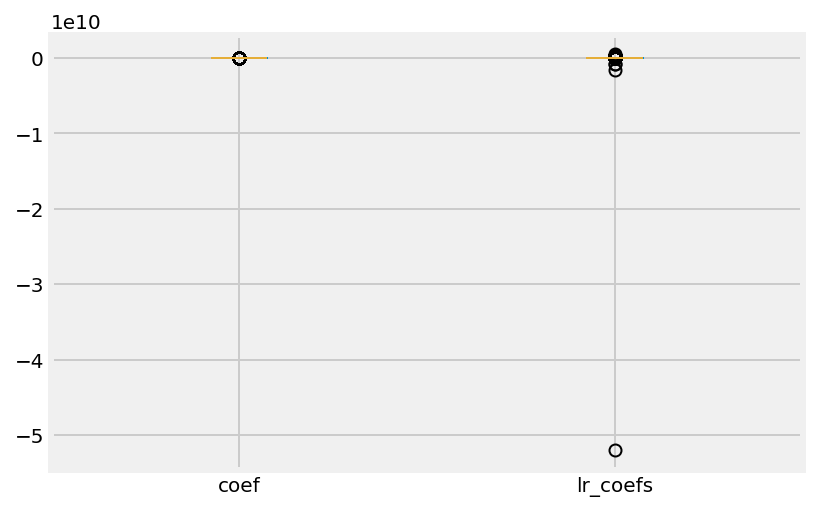

In [59]:
ridge_coefs[["coef", "lr_coefs"]].plot(kind="box")

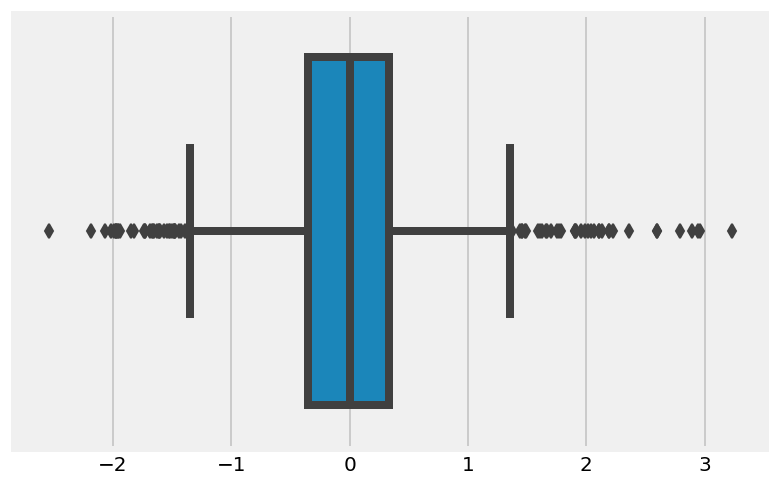

In [60]:
sns.boxplot(ridge.coef_)

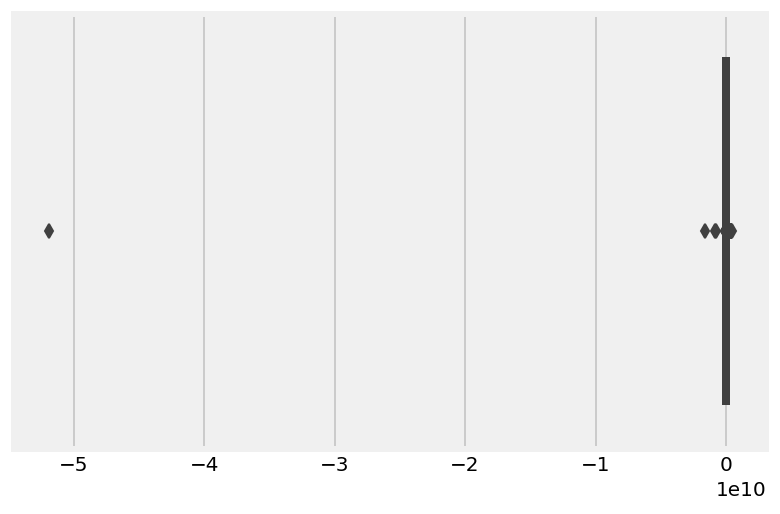

In [61]:
sns.boxplot(lr.coef_)

In [62]:
lr.coef_.std()

2048554368.396732

In [64]:
lr.coef_.mean()

-62639010.83469551

In [63]:
ridge.coef_.std()

0.8299964224259643

In [67]:
ridge_coefs.describe()

,coef,lr_coefs
count,644.000000,6.440000e+02
mean,0.001567,-6.263901e+07
std,0.830642,2.050147e+09
min,-2.544035,-5.193233e+10
25%,-0.348228,-7.559552e+05
50%,0.000000,-1.843044e+04
75%,0.334395,3.143012e+05
max,3.230819,4.528660e+08


In [69]:
ridge_coefs["coef"]= ridge_coefs["coef"].abs()

In [72]:
ridge_coefs.sort_values("coef", ascending=False).head()

,feature,coef,lr_coefs
233,SEASON_OPPONENT:mem:2009-10,3.230819,1.014314e+07
466,SEASON_OPPONENT:sea:2004-05,2.963692,-7.559476e+05
333,SEASON_OPPONENT:nyk:2008-09,2.942400,-3.262354e+05
395,SEASON_OPPONENT:phx:2009-10,2.892760,1.014314e+07
186,SEASON_OPPONENT:hou:2015-16,2.789292,-6.630700e+05


In [65]:
ridge.coef_.mean()

0.0015668467200630385

$X$

---
### 7. Examine your ridge model's coefficients

Does anything j\ump out at you? Use any the tools we've learned so far like histograms, barplots, and other descriptive statistics to compare the ridge model's fit to the linear regression we used earlier.


#### Observations



---

### 8. Play around with the `alpha` hyper parameter

How does this impact the coefficients of the fit model?

#### EX:
```python
ridge = Ridge(alpha = 10.0)
```

Some good values to try might be `0`, `0.1`, `1.0`, `10`, `100`

In [7]:
# A:

---

### 9. Fit a `Lasso` model and examine it's coefficients

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

- Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
- What percent of the variables in the original dataset are "zeroed-out" by the lasso?
- What are the most important predictors for how many shots Kobe made in a game?

In [8]:
# A:

---

### 10. Tune the alpha for your `Lasso` model

How does this influence the coefficients? The model performance on the train and the test sets?

In [9]:
# A:

---

### 11. Synthesize what you've discovered

Write a couple of sentences telling the story: 
- How did a standard linear regression perform on the Kobe dataset? What qualities of this dataset caused these results>
- How did a Ridge perform in comparison? What clues could you glean from its coefficients? How does `alpha` seem to dictate the coefficients?
- What about the the `Lasso`?
- When will be useful?

In [10]:
# A: